
# Disney. Какие фильмы надо снимать?

Мы фанаты фильмов Disney! Добрый человек собрал [данные](https://data.world/kgarrett/disney-character-success-00-16) по всем фильмам этой компании. Давайте поможем определить, какие жанры самые востребованные, чтобы они не прогадали, какой фильм производить следующим.

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# подавляем scientific notation
np.set_printoptions(formatter={'all':lambda x: str(x)})
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# увеличием размер визуализаций
sns.set(rc={'figure.figsize':(12,9)})

In [ ]:
# читаем данные
movies_gross = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/disney_movies_total_gross.csv', parse_dates=['release_date'])
movies_gross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [ ]:
# для начала просто посмотрим на жанры в топе. Вдруг все очевидно?
top_10_by_gross = movies_gross.sort_values('inflation_adjusted_gross', ascending=False)
top_10_by_gross.head(10)

# ваши выводы?

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


In [ ]:
# а можеть есть какие-то тенденции по жанрам? 
# Посмотрим динамику по времени самым простым способом

# извлекаем год из даты выхода фильма
movies_gross['release_year'] = movies_gross.release_date.dt.year

# посчитаем средний доход в разрезе жанров и лет
gross_by_genres = movies_gross.groupby(['genre', 'release_year']).median()

gross_by_genres

total_gross  inflation_adjusted_gross
genre   release_year                                       
Action  1981                 0.00                      0.00
        1982          26918576.00               77184895.00
        1988          17577696.00               36053517.00
        1990          59249588.50              118358772.00
        1991          28924936.50               57918572.50
...                           ...                       ...
Western 1995           8247627.00               15983331.00
        2000          56932305.00               89042541.00
        2003          58331254.00               81547672.00
        2004          44846546.50               60878640.00
        2013          89302115.00               92597388.00

[218 rows x 2 columns]

In [ ]:
# отсортируем по убыванию дохода
gross_by_genres = gross_by_genres.reset_index().sort_values('inflation_adjusted_gross', ascending=False)

gross_by_genres.head(10)

,genre,release_year,total_gross,inflation_adjusted_gross
164,Musical,1937,184925485.00,5228953251.00
26,Adventure,1940,84300000.00,2188229052.00
165,Musical,1940,83320000.00,2187090808.00
121,Drama,1955,93600000.00,1236035515.00
27,Adventure,1946,65000000.00,1078510579.00
120,Drama,1950,85000000.00,920608730.00
66,Comedy,1961,89190703.50,836482779.50
167,Musical,1967,141843000.00,789612346.00
21,Action,2012,623279547.00,660081224.00
28,Adventure,1954,28200000.00,528279994.00


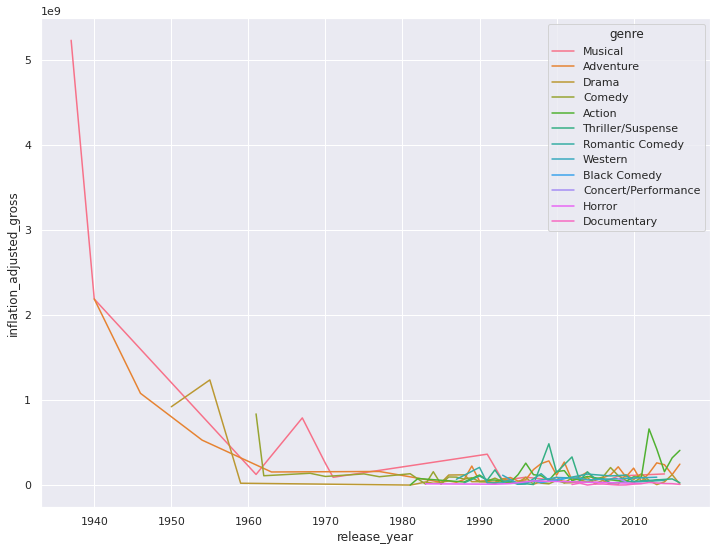

In [ ]:
# визуализируем. выводы?
import seaborn as sns


sns.lineplot(x='release_year', 
            y='inflation_adjusted_gross',  
            hue='genre', 
            data=gross_by_genres)

Построим линейную регрессию, чтобы определить как зависит доходность фильма от жанра.

Намм необходимо преобразовать нечисловые признаки (для этого будем использовать кодировшик [**OneHotEncoder**](https://habr.com/ru/company/ods/blog/326418/#rabota-s-kategorialnymi-priznakami-label-encoding-one-hot-encoding-hashing-trick)) в числовой вид, иначе мы не сможем применять LR (алгоритмы работаю только с числами). Как думаете, почему надо именно OHE?

In [ ]:
movies_gross_to_dummies = pd.get_dummies(data=movies_gross['genre'])
movies_gross_to_dummies.head()

,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# строим модель линейной регрессии
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(movies_gross_to_dummies, movies_gross['inflation_adjusted_gross'])
baseline = lr.intercept_
coefs = lr.coef_

print(baseline)
inter = pd.DataFrame(zip(movies_gross_to_dummies.columns, coefs))
inter

# Давайте проинтепретируем результаты. 

21623728.470587075


,0,1
0,Action,115849691.18
1,Adventure,168773683.61
2,Black Comedy,30619763.20
3,Comedy,63044001.82
4,Concert/Performance,35787110.53
5,Documentary,-8905702.35
6,Drama,50269293.32
7,Horror,1790120.20
8,Musical,581974132.53
9,Romantic Comedy,56153355.57


In [ ]:
# а теперь за intercept берем один из жанров 
# проблема мультиколлинеарности: https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a
movies_gross_to_dummies = pd.get_dummies(data=movies_gross['genre'], drop_first=True)

lr = LinearRegression()  

lr.fit(movies_gross_to_dummies, movies_gross['inflation_adjusted_gross'])

action = lr.intercept_
coefs = lr.coef_

print(action)
inter = pd.DataFrame(zip(movies_gross_to_dummies.columns, coefs))
inter

102921757.36842033


,0,1
0,Adventure,87475654.71
1,Black Comedy,-50678265.70
2,Comedy,-18254027.08
3,Concert/Performance,-45510918.37
4,Documentary,-90203731.24
5,Drama,-31028735.58
6,Horror,-79507908.70
7,Musical,500676103.63
8,Romantic Comedy,-25144673.32
9,Thriller/Suspense,-13267967.62


In [ ]:
# рассчитываем бутстрэповский доверительный интервал
coef_df = pd.DataFrame()

# берем много выборок из жанра+доход
action = []
for i in range(3000):
    genres_by_gross =  movies_gross[['genre', 'inflation_adjusted_gross']].sample(frac=1, replace=True)
    dummies = pd.get_dummies(data=genres_by_gross['genre'], drop_first=True) # drop_first отбросит первый признак (жанр), в нашем случае это Action
    lr = LinearRegression().fit(dummies, genres_by_gross['inflation_adjusted_gross'])
    coefs = pd.DataFrame(zip(dummies.columns, lr.coef_))
    coef_df = pd.concat([coef_df, coefs])
    action.append(lr.intercept_)
coef_df.columns = ['genre', 'coef']

In [ ]:
# смотрим коэффициенты для всех жанров
coef_df

,genre,coef
0,Adventure,104573632.95
1,Black Comedy,-37799736.15
2,Comedy,-23794613.78
3,Concert/Performance,-59597624.82
4,Documentary,-87843546.86
...,...,...
6,Horror,-74791107.11
7,Musical,400815211.08
8,Romantic Comedy,-13712942.87
9,Thriller/Suspense,-14324765.56


In [ ]:
# смотрим intercept (Action)
action

[97772309.81666651,
 105484182.74509811,
 95600363.61016947,
 94689286.82539678,
 116232164.31147534,
 100585891.08928576,
 102848903.43181814,
 92772313.29032254,
 127110806.18965508,
 95050487.7735848,
 83547286.78260875,
 155561550.80357146,
 106880408.43478225,
 90328799.12280706,
 119799268.00000001,
 77332876.07692307,
 120497582.54545456,
 114862930.64000002,
 91938653.55000009,
 143839001.2592592,
 145340251.08888894,
 117908858.50793642,
 94181859.32258068,
 114790419.03703699,
 103498210.26923068,
 106865712.61971825,
 100023354.25757584,
 95850911.94339617,
 102989385.48214285,
 93113171.26415092,
 102035157.64705887,
 57842483.25999995,
 103461713.58823532,
 80332945.65517245,
 93501392.09090893,
 161965839.6034483,
 119735255.87036988,
 118465981.19672132,
 107350723.51020412,
 102552029.25454526,
 95614817.66666675,
 122690756.5999999,
 122965688.7258065,
 112318787.46296301,
 113965030.33999999,
 94998833.49206342,
 86661161.61538464,
 94532300.415385,
 101485578.7551018

In [ ]:
# считаем доверительный интервал для intercept (Action)
confidence_interval_action = pd.Series(action).quantile([0.025, 0.975])
confidence_interval_action
# выводы?

0.03    71508528.04
0.97   140110229.85
dtype: float64

In [ ]:
# считаем доверительный интервал для коэффициента Adventure
confidence_interval_adv = coef_df.query('genre == "Adventure"').coef.quantile([0.025, 0.975])
confidence_interval_adv
# выводы?

0.03    32263985.39
0.97   144438161.66
Name: coef, dtype: float64

In [ ]:
# считаем доверительный интервал для коэффициента Comedy
confidence_interval_adv = coef_df.query('genre == "Black Comedy"').coef.quantile([0.025, 0.975])
confidence_interval_adv
# выводы?

0.03   -95420278.60
0.97   -10934772.80
Name: coef, dtype: float64